<a href="https://colab.research.google.com/github/arturbernardo/benfords_law_2022/blob/main/Benford_Distribution_Por_Cidade.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Analise dos votos das eleições de 2022 na perspectiva da lei de Benford.

https://en.wikipedia.org/wiki/Benford%27s_law

---



**Importate**:
A lei de Benford não serve para comprovar irregularidades em eleições, mas ela serve como uma interessante ferramenta para que se procure por anomalias.
Sua teoria é complexa, o simples fato de um conjunto de números desviar na distribuição esperada não significa fraude. Usá-la para apontar fraudes sem entender a teoria corretamente é irresponsável.
Essa análise faz parte de uma série de análises feitas por mim, em nenhuma delas eu encontrei nada suspeito no processo eleitoral presidencial de 2022.
O tamanho das cidades é enviesado e foge da lei de Benford pelo fato de que muitas regiões se emancipam por ter mais de 2 mil habitantes.

In [1]:
import pandas as pd
import plotly.express as px
from google.colab import drive
from pathlib import Path
import os
import numpy as np
import matplotlib.pyplot as plt
import math
import gspread as gs


In [2]:
pd.options.display.max_columns = None


In [3]:
drive.mount('/content/drive')


Mounted at /content/drive


In [4]:
all = pd.DataFrame()

states = ['AC', 'AL', 'AM', 'AP', 'DF', 'ES', 'MA', 'MS', 'MG', 'MT', 'PA', 'PB', 'PE', 'PI', 'PR', 'RJ', 'RN', 'RO', 'RR', 'SC', 'SE', 'ZZ', 'TO', 'SP', 'RS', 'CE', 'GO', 'BA']
# states = ['MS']

for state in states:
  st = pd.read_csv('/content/drive/MyDrive/data/eleicoes2022unziped/bweb_2t_'+state+'_311020221535.csv', encoding="ISO-8859-1", sep = ';',
                   dtype={
                            "SG_UF": pd.CategoricalDtype(),
                            "CD_MUNICIPIO": pd.Int64Dtype(),
                            "NR_LOCAL_VOTACAO": pd.Int64Dtype(),
                            "NR_ZONA": pd.Int64Dtype(),
                            "NR_SECAO": pd.CategoricalDtype()
                        })

  st_presidente = st[st.CD_CARGO_PERGUNTA == 1]
  filtered_df = st_presidente.loc[(st_presidente['NR_PARTIDO'] == 13) | (st_presidente['NR_PARTIDO'] == 22)]

  toUnion = [all, filtered_df]

  all = pd.concat(toUnion)

all


,DT_GERACAO,HH_GERACAO,ANO_ELEICAO,CD_TIPO_ELEICAO,NM_TIPO_ELEICAO,CD_PLEITO,DT_PLEITO,NR_TURNO,CD_ELEICAO,DS_ELEICAO,SG_UF,CD_MUNICIPIO,NM_MUNICIPIO,NR_ZONA,NR_SECAO,NR_LOCAL_VOTACAO,CD_CARGO_PERGUNTA,DS_CARGO_PERGUNTA,NR_PARTIDO,SG_PARTIDO,NM_PARTIDO,DT_BU_RECEBIDO,QT_APTOS,QT_COMPARECIMENTO,QT_ABSTENCOES,CD_TIPO_URNA,DS_TIPO_URNA,CD_TIPO_VOTAVEL,DS_TIPO_VOTAVEL,NR_VOTAVEL,NM_VOTAVEL,QT_VOTOS,NR_URNA_EFETIVADA,CD_CARGA_1_URNA_EFETIVADA,CD_CARGA_2_URNA_EFETIVADA,CD_FLASHCARD_URNA_EFETIVADA,DT_CARGA_URNA_EFETIVADA,DS_CARGO_PERGUNTA_SECAO,DS_AGREGADAS,DT_ABERTURA,DT_ENCERRAMENTO,QT_ELEITORES_BIOMETRIA_NH,DT_EMISSAO_BU,NR_JUNTA_APURADORA,NR_TURMA_APURADORA
0,31/10/2022,15:35:43,2022,0,Eleição Ordinária,407,30/10/2022,2,545,Eleição Geral Federal 2022,AC,1392,RIO BRANCO,1,3,1279,1,Presidente,13,PT,Partido dos Trabalhadores,30/10/2022 17:34:43,185,147,38,1,APURADA,1,Nominal,13,LULA,48,2046404,428.953.752.256.007.171.,487.308,90FF9DFC,23/09/2022 08:44:00,1 - 3,#NULO#,30/10/2022 06:01:16,30/10/2022 15:00:59,9,30/10/2022 15:04:47,-1,-1
2,31/10/2022,15:35:43,2022,0,Eleição Ordinária,407,30/10/2022,2,545,Eleição Geral Federal 2022,AC,1392,RIO BRANCO,1,3,1279,1,Presidente,22,PL,Partido Liberal,30/10/2022 17:34:43,185,147,38,1,APURADA,1,Nominal,22,JAIR BOLSONARO,96,2046404,428.953.752.256.007.171.,487.308,90FF9DFC,23/09/2022 08:44:00,1 - 3,#NULO#,30/10/2022 06:01:16,30/10/2022 15:00:59,9,30/10/2022 15:04:47,-1,-1
4,31/10/2022,15:35:43,2022,0,Eleição Ordinária,407,30/10/2022,2,545,Eleição Geral Federal 2022,AC,1392,RIO BRANCO,1,4,1139,1,Presidente,22,PL,Partido Liberal,30/10/2022 17:25:33,339,259,80,1,APURADA,1,Nominal,22,JAIR BOLSONARO,167,2048249,984.509.427.112.588.751.,686.216,90FF9DFC,23/09/2022 09:34:00,1 - 4,#NULO#,30/10/2022 06:00:01,30/10/2022 15:01:55,13,30/10/2022 15:05:12,-1,-1
5,31/10/2022,15:35:43,2022,0,Eleição Ordinária,407,30/10/2022,2,545,Eleição Geral Federal 2022,AC,1392,RIO BRANCO,1,4,1139,1,Presidente,13,PT,Partido dos Trabalhadores,30/10/2022 17:25:33,339,259,80,1,APURADA,1,Nominal,13,LULA,83,2048249,984.509.427.112.588.751.,686.216,90FF9DFC,23/09/2022 09:34:00,1 - 4,#NULO#,30/10/2022 06:00:01,30/10/2022 15:01:55,13,30/10/2022 15:05:12,-1,-1
8,31/10/2022,15:35:43,2022,0,Eleição Ordinária,407,30/10/2022,2,545,Eleição Geral Federal 2022,AC,1392,RIO BRANCO,1,5,1031,1,Presidente,13,PT,Partido dos Trabalhadores,30/10/2022 17:28:42,341,260,81,1,APURADA,1,Nominal,13,LULA,72,2048064,984.509.533.412.818.797.,804.743,90FF9DFC,23/09/2022 09:46:00,1 - 5,#NULO#,30/10/2022 06:00:50,30/10/2022 15:02:23,8,30/10/2022 15:05:25,-1,-1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
269569,31/10/2022,15:48:51,2022,0,Eleição Ordinária,407,30/10/2022,2,545,Eleição Geral Federal 2022,BA,30007,LUÍS EDUARDO MAGALHÃES,205,210,1171,1,Presidente,13,PT,Partido dos Trabalhadores,30/10/2022 18:24:56,208,193,15,1,APURADA,1,Nominal,13,LULA,25,1016432,757.148.752.850.405.603.,152.278,D530864C,27/09/2022 16:42:00,1 - 210,#NULO#,30/10/2022 08:00:01,30/10/2022 17:00:25,11,30/10/2022 17:02:24,-1,-1
269574,31/10/2022,15:48:51,2022,0,Eleição Ordinária,407,30/10/2022,2,545,Eleição Geral Federal 2022,BA,30007,LUÍS EDUARDO MAGALHÃES,205,211,1309,1,Presidente,22,PL,Partido Liberal,30/10/2022 18:10:32,109,87,22,1,APURADA,1,Nominal,22,JAIR BOLSONARO,58,1075408,231.996.595.432.396.438.,158.553,96BD8C44,27/09/2022 20:26:00,1 - 211,#NULO#,30/10/2022 08:00:01,30/10/2022 17:11:29,11,30/10/2022 17:13:15,-1,-1
269576,31/10/2022,15:48:51,2022,0,Eleição Ordinária,407,30/10/2022,2,545,Eleição Geral Federal 2022,BA,30007,LUÍS EDUARDO MAGALHÃES,205,211,1309,1,Presidente,13,PT,Partido dos Trabalhadores,30/10/2022 18:10:32,109,87,22,1,APURADA,1,Nominal,13,LULA,27,1075408,231.996.595.432.396.438.,158.553,96BD8C44,27/09/2022 20:26:00,1 - 211,#NULO#,30/10/2022 08:00:01,30/10/2022 17:11:29,11,30/10/2022 17:13:15,-1,-1
269581,31/10/2022,15:48:51,20

In [9]:
df2 = all[['NR_LOCAL_VOTACAO',
                   'CD_MUNICIPIO',
                   'NR_ZONA',
                   'NR_SECAO',
                   'QT_VOTOS',
                   'QT_APTOS',
                   'QT_COMPARECIMENTO',
                   'CD_CARGO_PERGUNTA',
                   'NR_PARTIDO',
                   'NM_MUNICIPIO',
                   'SG_UF']]

In [6]:
df_lula = df2.loc[(df2['NR_PARTIDO'] == 13)]
df_lula_agg = df_lula.groupby(["CD_MUNICIPIO", "NR_PARTIDO", "SG_UF"]).agg({"QT_VOTOS": sum, "QT_APTOS": sum, "QT_COMPARECIMENTO": sum, "NM_MUNICIPIO": max})

df_lula_agg

,,,QT_VOTOS,QT_APTOS,QT_COMPARECIMENTO,NM_MUNICIPIO
CD_MUNICIPIO,NR_PARTIDO,SG_UF,,,,
19,13,RO,6838,28173,20379,GUAJARÁ-MIRIM
35,13,RO,92636,350722,271850,PORTO VELHO
51,13,RO,16711,92356,70203,JI-PARANÁ
78,13,RO,10513,69784,51839,ARIQUEMES
94,13,RO,12437,66503,51987,CACOAL
...,...,...,...,...,...,...
99180,13,ZZ,9,65,25,NASSAU
99287,13,ZZ,13,34,14,LUSACA
99317,13,ZZ,156,250,191,TALIN


In [7]:
df_bolsonaro = df2.loc[(df2['NR_PARTIDO'] == 22)]
df_bolsonaro_agg = df_bolsonaro.groupby(["CD_MUNICIPIO", "NR_PARTIDO", "SG_UF"]).agg({"QT_VOTOS": sum, "QT_APTOS": sum, "QT_COMPARECIMENTO": sum, "NM_MUNICIPIO": max})
df_bolsonaro_agg


,,,QT_VOTOS,QT_APTOS,QT_COMPARECIMENTO,NM_MUNICIPIO
CD_MUNICIPIO,NR_PARTIDO,SG_UF,,,,
19,22,RO,13001,28173,20379,GUAJARÁ-MIRIM
35,22,RO,169299,350722,271850,PORTO VELHO
51,22,RO,51415,92356,70203,JI-PARANÁ
78,22,RO,39901,69784,51839,ARIQUEMES
94,22,RO,37980,66503,51987,CACOAL
...,...,...,...,...,...,...
99180,22,ZZ,14,65,25,NASSAU
99287,22,ZZ,1,34,14,LUSACA
99317,22,ZZ,23,250,191,TALIN


In [ ]:
df_lula_local = {}
for x in range(1, 10):
  df_lula_local[x] = df_lula_agg.loc[df_lula_agg['QT_VOTOS'].astype(str).str.startswith(str(x), na=False)]

df_lula_local[2]

In [ ]:
df_bolsonaro_local = {}
for x in range(1, 10):
  df_bolsonaro_local[x] = df_bolsonaro_agg.loc[df_bolsonaro_agg['QT_VOTOS'].astype(str).str.startswith(str(x), na=False)]

df_bolsonaro_local[2]

In [12]:
total_lula = 0
for k in df_lula_local:
  total_lula = total_lula + df_lula_local[k].size
total_lula

22832

In [13]:
total_bolsonaro = 0
for k in df_bolsonaro_local:
  total_bolsonaro = total_bolsonaro + df_bolsonaro_local[k].size
total_bolsonaro

22828

In [14]:
dic_lula_percentual = {}

for x in range(1, 10):
  dic_lula_percentual[x] = df_lula_local[x].size  * 100 / total_lula
dic_lula_percentual

# cem = 0
# for k in dic_lula_percentual:
#   cem = cem + dic_lula_percentual[k]
# cem # (tem de dar 100% a soma)

{1: 30.448493342676944,
 2: 18.710581639803785,
 3: 12.351086194814295,
 4: 8.864751226348984,
 5: 7.375613174491941,
 6: 6.762438682550806,
 7: 5.676243868255081,
 8: 5.168185003503854,
 9: 4.64260686755431}

In [16]:
dic_bolsonaro_percentual = {}

for x in range(1, 10):
  dic_bolsonaro_percentual[x] = df_bolsonaro_local[x].size  * 100 / total_bolsonaro
dic_bolsonaro_percentual

{1: 34.99211494655686,
 2: 17.592430348694585,
 3: 11.897669528649027,
 4: 7.9025757841247595,
 5: 6.903802347993692,
 6: 5.957595934816892,
 7: 5.4319257052742245,
 8: 4.8011214298230245,
 9: 4.520763974066935}

# `POR CIDADE, LULA`

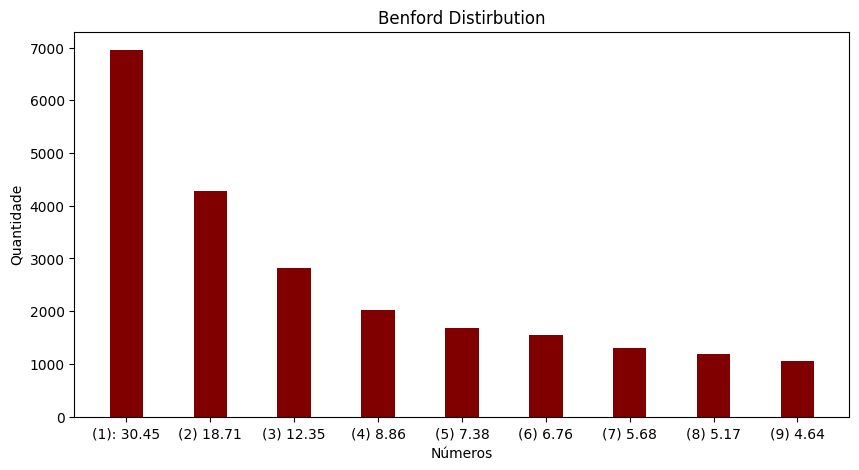

In [17]:
labels = ['(1): %.2f' %dic_lula_percentual[1],
        '(2) %.2f' %dic_lula_percentual[2],
        '(3) %.2f' %dic_lula_percentual[3],
        '(4) %.2f' %dic_lula_percentual[4],
        '(5) %.2f' %dic_lula_percentual[5],
        '(6) %.2f' %dic_lula_percentual[6],
        '(7) %.2f' %dic_lula_percentual[7],
        '(8) %.2f' %dic_lula_percentual[8],
        '(9) %.2f' %dic_lula_percentual[9]]

valores = [df_lula_local[1].size,
        df_lula_local[2].size,
        df_lula_local[3].size,
        df_lula_local[4].size,
        df_lula_local[5].size,
        df_lula_local[6].size,
        df_lula_local[7].size,
        df_lula_local[8].size,
        df_lula_local[9].size]
numbers = list(labels)
amounts = list(valores)
# amounts
fig = plt.figure(figsize = (10, 5))

# creating the bar plot
plt.bar(numbers, amounts, color ='maroon',
        width = 0.4)

plt.xlabel("Números")
plt.ylabel("Quantidade")
plt.title("Benford Distirbution")
plt.show()

# POR CIDADE, BOLSONARO

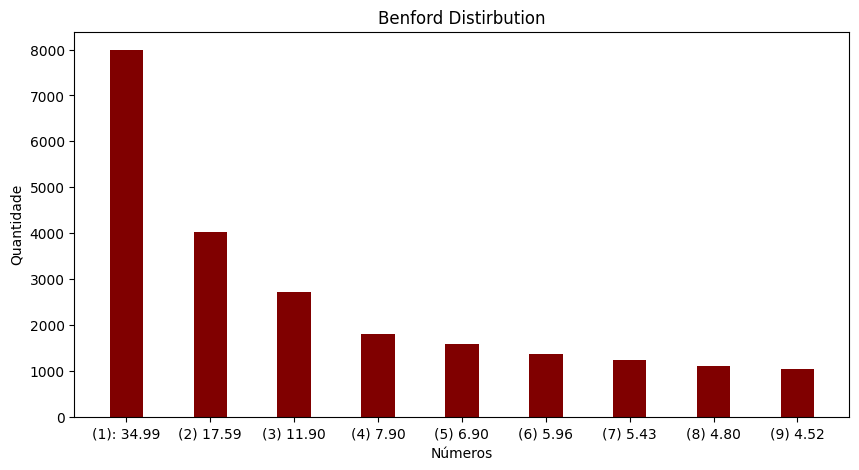

In [18]:
labels = ['(1): %.2f' %dic_bolsonaro_percentual[1],
          '(2) %.2f' %dic_bolsonaro_percentual[2],
          '(3) %.2f' %dic_bolsonaro_percentual[3],
          '(4) %.2f' %dic_bolsonaro_percentual[4],
          '(5) %.2f' %dic_bolsonaro_percentual[5],
          '(6) %.2f' %dic_bolsonaro_percentual[6],
          '(7) %.2f' %dic_bolsonaro_percentual[7],
          '(8) %.2f' %dic_bolsonaro_percentual[8],
          '(9) %.2f' %dic_bolsonaro_percentual[9]]

valores = [df_bolsonaro_local[1].size,
          df_bolsonaro_local[2].size,
          df_bolsonaro_local[3].size,
          df_bolsonaro_local[4].size,
          df_bolsonaro_local[5].size,
          df_bolsonaro_local[6].size,
          df_bolsonaro_local[7].size,
          df_bolsonaro_local[8].size,
          df_bolsonaro_local[9].size]
numbers = list(labels)
amounts = list(valores)
# amounts
fig = plt.figure(figsize = (10, 5))

# creating the bar plot
plt.bar(numbers, amounts, color ='maroon',
width = 0.4)

plt.xlabel("Números")
plt.ylabel("Quantidade")
plt.title("Benford Distirbution")
plt.show()

# COMPARAÇÃO COM APTOS
O número de habitantes por cidade é enviesado, por isso a lei de Benford não se adequa perfeitamente neste caso. Aqui uma comparação mostrando que a quantidade de aptos por cidade foge da distribuição.

In [ ]:
df_lula_aptos_local = {}
for x in range(1, 10):
  df_lula_aptos_local[x] = df_lula_agg.loc[df_lula_agg['QT_APTOS'].astype(str).str.startswith(str(x), na=False)]

df_lula_aptos_local[2]

In [27]:
df_bolsonaro_aptos_local = {}
for x in range(1, 10):
  df_bolsonaro_aptos_local[x] = df_bolsonaro_agg.loc[df_bolsonaro_agg['QT_APTOS'].astype(str).str.startswith(str(x), na=False)]

df_bolsonaro_aptos_local[2]

,,,QT_VOTOS,QT_APTOS,QT_COMPARECIMENTO,NM_MUNICIPIO
CD_MUNICIPIO,NR_PARTIDO,SG_UF,,,,
19,22,RO,13001,28173,20379,GUAJARÁ-MIRIM
116,22,RO,14932,26480,20615,PIMENTA BUENO
256,22,RO,13595,23903,18420,ESPIGÃO DO OESTE
396,22,RO,11490,23639,16644,MACHADINHO D'OESTE
728,22,RO,1630,2877,2276,PRIMAVERA DE RONDÔNIA
...,...,...,...,...,...,...
98213,22,RS,12726,25023,20687,TEUTÔNIA
98418,22,AM,7935,25234,17719,PRESIDENTE FIGUEIREDO
98817,22,MT,9632,22679,17025,PEIXOTO DE AZEVEDO


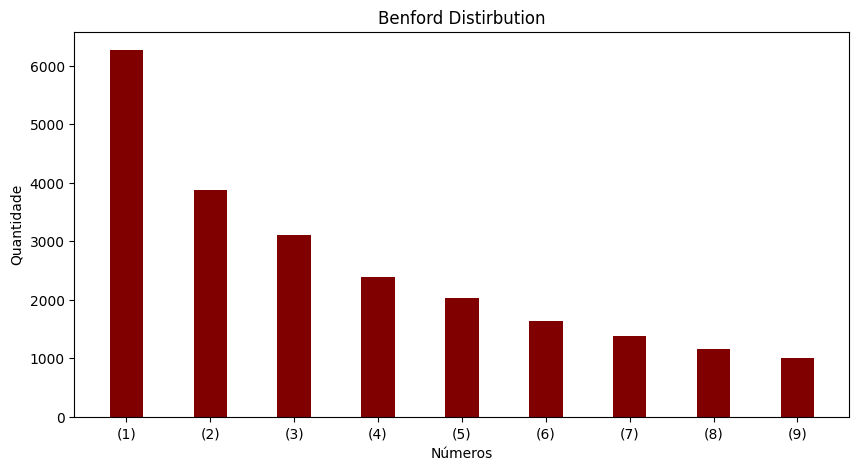

In [26]:
labels = ['(1)',
          '(2)',
          '(3)',
          '(4)',
          '(5)',
          '(6)',
          '(7)',
          '(8)',
          '(9)']

valores = [df_lula_aptos_local[1].size,
        df_lula_aptos_local[2].size,
        df_lula_aptos_local[3].size,
        df_lula_aptos_local[4].size,
        df_lula_aptos_local[5].size,
        df_lula_aptos_local[6].size,
        df_lula_aptos_local[7].size,
        df_lula_aptos_local[8].size,
        df_lula_aptos_local[9].size]
numbers = list(labels)
amounts = list(valores)
# amounts
fig = plt.figure(figsize = (10, 5))

# creating the bar plot
plt.bar(numbers, amounts, color ='maroon',
        width = 0.4)

plt.xlabel("Números")
plt.ylabel("Quantidade")
plt.title("Benford Distirbution")
plt.show()

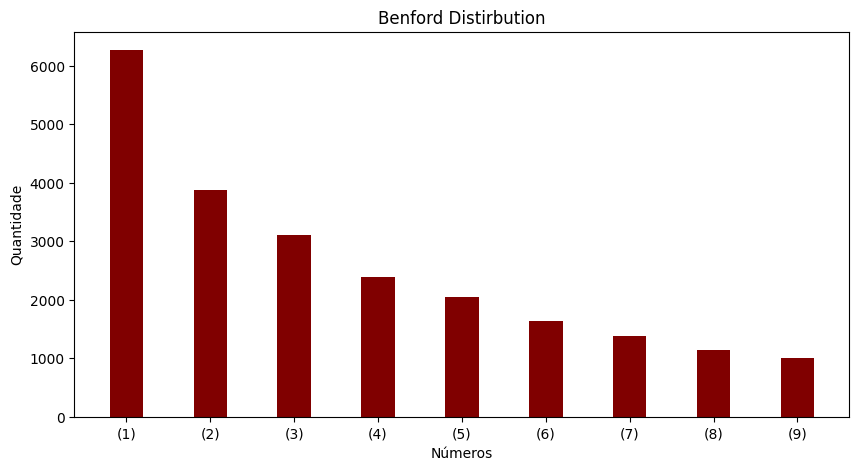

In [28]:
labels = ['(1)',
          '(2)',
          '(3)',
          '(4)',
          '(5)',
          '(6)',
          '(7)',
          '(8)',
          '(9)']

valores = [df_bolsonaro_aptos_local[1].size,
          df_bolsonaro_aptos_local[2].size,
          df_bolsonaro_aptos_local[3].size,
          df_bolsonaro_aptos_local[4].size,
          df_bolsonaro_aptos_local[5].size,
          df_bolsonaro_aptos_local[6].size,
          df_bolsonaro_aptos_local[7].size,
          df_bolsonaro_aptos_local[8].size,
          df_bolsonaro_aptos_local[9].size]
numbers = list(labels)
amounts = list(valores)
# amounts
fig = plt.figure(figsize = (10, 5))

# creating the bar plot
plt.bar(numbers, amounts, color ='maroon',
width = 0.4)

plt.xlabel("Números")
plt.ylabel("Quantidade")
plt.title("Benford Distirbution")
plt.show()

# POPULAÇÃO DE CIDADES PELA DISTRIBUIÇÃO DE BENFORD


In [ ]:
censo_municipios = pd.read_csv('/content/drive/MyDrive/data/dadosBrasil/CD2022_Populacao_Coletada_Imputada_e_Total_Municipio_e_UF.csv', encoding="ISO-8859-1", sep = ',',
                    dtype={
                            "UF": pd.CategoricalDtype(),
                            "COD. MUNIC": pd.Int64Dtype(),
                            "POP. TOTAL": pd.StringDtype()
                        })

censo_municipios = censo_municipios.iloc[:, 1:]
censo_municipios["POP_TOTAL"] = censo_municipios["POP. TOTAL"].str.replace(" ", "")
censo_municipios["POP_TOTAL"] = censo_municipios["POP_TOTAL"].astype(int)
censo_municipios


In [ ]:
df_pop_municipios = {}
for x in range(1, 10):
  df_pop_municipios[x] = censo_municipios.loc[censo_municipios['POP_TOTAL'].astype(str).str.startswith(str(x), na=False)]

df_pop_municipios[6]

In [31]:
total_pop = 0
df_pop_total = {}
for x in range(1, 10):
  total_pop = total_pop + df_pop_municipios[x].size
  df_pop_total[x] = total_pop
  total_pop = 0

dic_pop_percentual = {}
for x in range(1, 10):
  dic_pop_percentual[x] = df_pop_total[x]  * 100 / censo_municipios.size
dic_pop_percentual

{1: 29.892280071813286,
 2: 18.29443447037702,
 3: 13.375224416517055,
 4: 10.825852782764812,
 5: 7.504488330341113,
 6: 6.642728904847397,
 7: 5.763016157989228,
 8: 4.290843806104129,
 9: 3.4111310592459607}

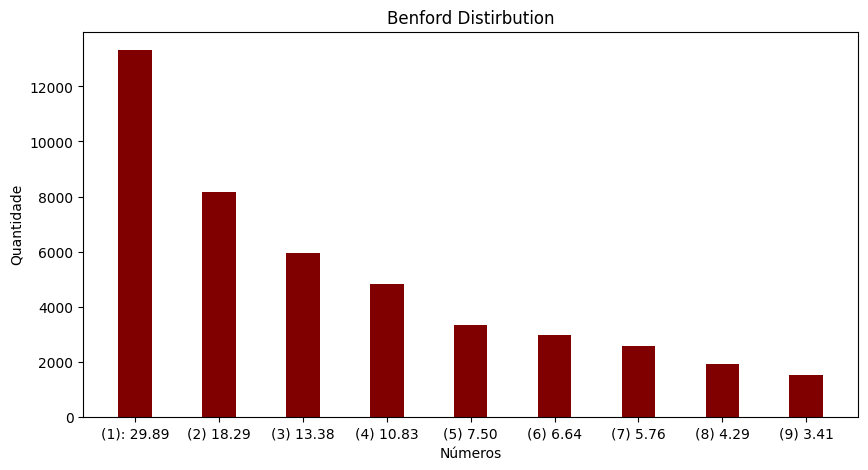

In [32]:
labels = ['(1): %.2f' %dic_pop_percentual[1],
          '(2) %.2f' %dic_pop_percentual[2],
          '(3) %.2f' %dic_pop_percentual[3],
          '(4) %.2f' %dic_pop_percentual[4],
          '(5) %.2f' %dic_pop_percentual[5],
          '(6) %.2f' %dic_pop_percentual[6],
          '(7) %.2f' %dic_pop_percentual[7],
          '(8) %.2f' %dic_pop_percentual[8],
          '(9) %.2f' %dic_pop_percentual[9]]

valores = [df_pop_municipios[1].size,
        df_pop_municipios[2].size,
        df_pop_municipios[3].size,
        df_pop_municipios[4].size,
        df_pop_municipios[5].size,
        df_pop_municipios[6].size,
        df_pop_municipios[7].size,
        df_pop_municipios[8].size,
        df_pop_municipios[9].size]
numbers = list(labels)
amounts = list(valores)
# amounts
fig = plt.figure(figsize = (10, 5))

# creating the bar plot
plt.bar(numbers, amounts, color ='maroon',
        width = 0.4)

plt.xlabel("Números")
plt.ylabel("Quantidade")
plt.title("Benford Distirbution")
plt.show()

In [34]:
print(df_pop_municipios[1].size)
print(df_pop_municipios[2].size)
print(df_pop_municipios[3].size)
print(df_pop_municipios[4].size)
print(df_pop_municipios[5].size)
print(df_pop_municipios[6].size)
print(df_pop_municipios[7].size)
print(df_pop_municipios[8].size)
print(df_pop_municipios[9].size)

13320
8152
5960
4824
3344
2960
2568
1912
1520
